<a href="https://colab.research.google.com/github/juanferrgiraldo/big-data/blob/master/Analisis_de_logs_access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solución análisis de log de access

In [0]:
!pip install python-nvd3
from nvd3 import multiBarChart
from nvd3 import scatterChart
from IPython.core.display import HTML
import matplotlib.pyplot as plt

###Activar unidad de Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Cargar el archivo con Python

In [0]:
file_log = '/content/drive/My Drive/Big Data/Taller Python/access_log'

def read_file(f):
    with open(f, 'r') as f:
        d = f.readlines()
        return [x.strip() for x in d]
    
data = read_file(file_log)

## Contamos las líneas que hay en el archivo

In [0]:
print('Numero de lineas en el archivo "' + file_log + '":')
print(len(data))

Numero de lineas en el archivo "/content/drive/My Drive/Big Data/Taller Python/access_log":
1546


##Imprimir registros

In [0]:
data[:10]

['64.242.88.10 - - [07/Mar/2004:16:05:49 -0800] "GET /twiki/bin/edit/Main/Double_bounce_sender?topicparent=Main.ConfigurationVariables HTTP/1.1" 401 12846',
 '64.242.88.10 - - [07/Mar/2004:16:06:51 -0800] "GET /twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1.3&rev2=1.2 HTTP/1.1" 200 4523',
 '64.242.88.10 - - [07/Mar/2004:16:10:02 -0800] "GET /mailman/listinfo/hsdivision HTTP/1.1" 200 6291',
 '64.242.88.10 - - [07/Mar/2004:16:11:58 -0800] "GET /twiki/bin/view/TWiki/WikiSyntax HTTP/1.1" 200 7352',
 '64.242.88.10 - - [07/Mar/2004:16:20:55 -0800] "GET /twiki/bin/view/Main/DCCAndPostFix HTTP/1.1" 200 5253',
 '64.242.88.10 - - [07/Mar/2004:16:23:12 -0800] "GET /twiki/bin/oops/TWiki/AppendixFileSystem?template=oopsmore&param1=1.12&param2=1.12 HTTP/1.1" 200 11382',
 '64.242.88.10 - - [07/Mar/2004:16:24:16 -0800] "GET /twiki/bin/view/Main/PeterThoeny HTTP/1.1" 200 4924',
 '64.242.88.10 - - [07/Mar/2004:16:29:16 -0800] "GET /twiki/bin/edit/Main/Header_checks?topicparent=Main.ConfigurationVariables 

##Filtro por tipo de petición y status

In [0]:
def filter_request(data_set, request_type, status):
  result_list = []
  for item in data_set:
    chunks = item.split(' ')
    if chunks[5][1:] == request_type and chunks[-2] == status:
      result_list.append(item)
  return result_list

###Peticiones GET con status 200:

In [0]:
  REQUEST_TYPE = 'GET'
  STATUS = '200'
  success_get = filter_request(data, REQUEST_TYPE, STATUS)   
  print(f'Número de peticiones {REQUEST_TYPE} con status {STATUS} encontradas: {len(success_get)}')
      


Número de peticiones GET con status 200 encontradas: 1254


###Peticiones GET con status 400:

In [0]:
REQUEST_TYPE = 'GET'
STATUS = '401'
failure_get = filter_request(data, REQUEST_TYPE, STATUS)   
print(f'Número de peticiones {REQUEST_TYPE} con status {STATUS} encontradas: {len(failure_get)}')

Número de peticiones GET con status 401 encontradas: 123


##Agrupar peticiones por dominio

In [0]:
def sort_by_value(val):
  return val[1]

In [0]:
def list2mat(data_list):
  return [chunk.split(' ') for chunk in data_list]

In [0]:
def search_domain(source_list, domain_name):
  for item in source_list:
    if domain_name in item[0]:
      return True
  return False

In [0]:
def group_list_by_domain(data_list):
  grouped_list = []
  amount = 0
  data_list = list2mat(data_list)
  for item in data_list:
    amount = 0
    if not search_domain(grouped_list, item[0]):
      for line in data_list:   
        amount = amount + line.count(item[0])
      grouped_list.append([item[0], amount])
  return grouped_list
    

###Peticiones exitosas agrupadas por dominio

In [0]:
success_grouped_list = group_list_by_domain(success_get)
success_grouped_list.sort(key = sort_by_value, reverse = True)
print(f'El número de peticiones exitosas por domino es:\n {success_grouped_list}')

El número de peticiones exitosas por domino es:
 [['64.242.88.10', 340], ['10.0.0.153', 182], ['cr020r01-3.sac.overture.com', 38], ['h24-70-69-74.ca.shawcable.net', 32], ['market-mail.panduit.com', 28], ['ts04-ip92.hevanet.com', 28], ['h24-71-236-129.ca.shawcable.net', 28], ['ip68-228-43-49.tc.ph.cox.net', 22], ['proxy0.haifa.ac.il', 19], ['212.92.37.62', 14], ['mail.geovariances.fr', 14], ['207.195.59.160', 14], ['ts05-ip44.hevanet.com', 14], ['prxint-sxb3.e-i.net', 13], ['lhr003a.dhl.com', 13], ['200-55-104-193.dsl.prima.net.ar', 13], ['203.147.138.233', 13], ['pc3-registry-stockholm.telia.net', 13], ['128.227.88.79', 12], ['216-160-111-121.tukw.qwest.net', 12], ['ns.wtbts.org', 12], ['p213.54.168.132.tisdip.tiscali.de', 11], ['195.246.13.119', 11], ['208-38-57-205.ip.cal.radiant.net', 11], ['ogw.netinfo.bg', 11], ['3_343_lt_someone', 10], ['cpe-203-51-137-224.vic.bigpond.net.au', 9], ['crawl24-public.alexa.com', 9], ['lj1024.inktomisearch.com', 8], ['2-110.cnc.bc.ca', 8], ['lj1036.i

###Gráfica

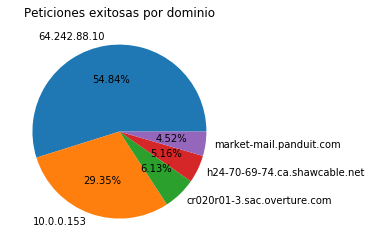

In [0]:
labels = [item[0] for item in success_grouped_list if success_grouped_list.index(item) < 5]
sections = [item[1] for item in success_grouped_list if success_grouped_list.index(item) < 5]


plt.pie(sections, labels=labels, autopct = '%1.2f%%')
plt.title('Peticiones exitosas por dominio')
plt.show()

###Peticiones fallidas agrupadas por dominio

In [0]:
failure_grouped_list = group_list_by_domain(failure_get)
failure_grouped_list.sort(key = sort_by_value, reverse = True)
print(f'El número de peticiones fallidas por domino es:\n {failure_grouped_list}')

El número de peticiones fallidas por domino es:
 [['64.242.88.10', 112], ['cr020r01-3.sac.overture.com', 6], ['prxint-sxb3.e-i.net', 1], ['p213.54.168.132.tisdip.tiscali.de', 1], ['market-mail.panduit.com', 1], ['195.246.13.119', 1], ['207.195.59.160', 1]]


###Gráfica

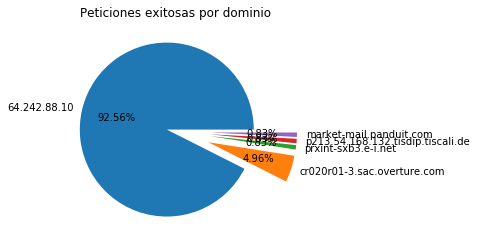

In [0]:
labels = [item[0] for item in failure_grouped_list if failure_grouped_list.index(item) < 5]
sections = [item[1] for item in failure_grouped_list if failure_grouped_list.index(item) < 5]


plt.pie(sections, labels=labels, explode = (0.1, 0.4, 0.4, 0.4, 0.4), autopct = '%1.2f%%')
plt.title('Peticiones exitosas por dominio')
plt.show()